# CLASSIFICATION OF BREAST CANCER INTO Malignant or Benign USING ARTIFICIAL NEURAL NETWORK

    *************************************************************
    Author:  Adeyemi Adedoyin Simeon
    Course:  AI: Machine Learning
    Date:    29th July, 2019
    Version: 1.2
    E-mail:  adeyemi.sa1@gmail.com
    *************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*

## Importing necessary modules

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine, load_iris

In [25]:
%matplotlib inline

## Loading the datasets

In [39]:
cancer_ds = load_breast_cancer()
# iris_ds = load_iris()

In [155]:
print(cancer_ds.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [156]:
cancer_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [27]:
# Converting the Dataset into a Dataframe
cancer_df = pd.DataFrame(cancer_ds.data, columns=cancer_ds.feature_names)

In [31]:
cancer_df['target'] = cancer_ds.target
cancer_df['target_class'] = cancer_df['target'].apply(lambda x: cancer_ds.target_names[x])

In [38]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


## Exploring data correlations

In [67]:
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


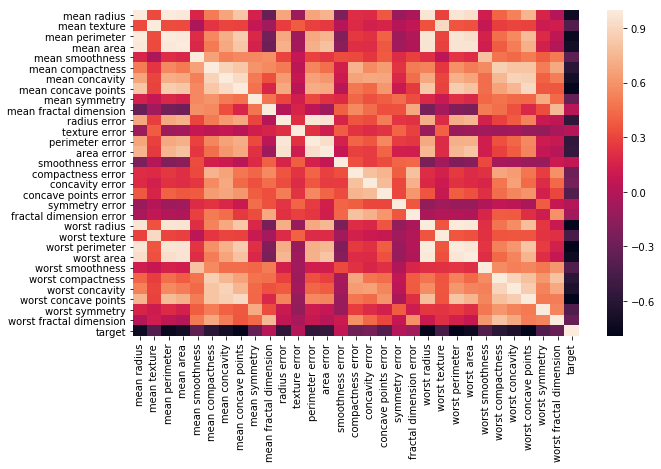

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(cancer_df.corr())

## Separating the dependent and independent variables

In [97]:
X = cancer_df.drop(['target','target_class'],axis=1)
y = cancer_df.target

## Scaling the dataset independent variables / features, X

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
scaled_x = scaler.fit_transform(X)
scaled_x = pd.DataFrame(scaled_x, index=X.index, columns=X.columns)

In [101]:
scaled_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Splitting the dataset into training and testing set

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30, random_state=42)

In [104]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,-0.109996,-0.321053,-0.158542,-0.198772,-1.204139,-0.769070,-0.753164,-0.919018,-1.236277,-0.991984,...,-0.192419,-0.523905,-0.299980,-0.271919,-1.545592,-0.457162,-0.555498,-0.828574,-0.891002,-0.765061
124,-0.215082,-0.674768,-0.241747,-0.288361,-1.794101,-0.589220,-0.098925,-0.539588,-1.422476,-0.647506,...,-0.416068,-0.476680,-0.454866,-0.436812,-1.309316,-0.007411,0.281190,-0.378019,-1.379572,-0.424808
421,0.159817,-1.235591,0.257479,0.003444,0.479635,1.502076,0.705598,0.363201,1.001751,1.596561,...,0.039513,-1.194821,0.203699,-0.125485,-0.051226,0.694887,0.238492,-0.057956,-0.119321,0.450762
195,-0.345728,-0.688730,-0.388796,-0.393877,-1.206274,-0.960480,-0.628619,-0.648697,0.063458,-0.868652,...,-0.494759,-0.598813,-0.490013,-0.492186,-0.993698,-0.659455,-0.459548,-0.491153,0.199382,-0.801081
545,-0.144078,0.916946,-0.196849,-0.232332,-0.277565,-0.698760,-0.741488,-0.631673,-0.538947,-0.678694,...,-0.190348,0.555750,-0.288363,-0.265064,-0.472051,-0.652457,-0.802570,-0.652707,-0.418610,-0.798864


In [105]:
y_train.head()

149    1
124    1
421    1
195    1
545    1
Name: target, dtype: int32

In [106]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
70,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,...,1.779007,0.147012,1.746605,1.732277,-0.572873,-0.131459,-0.016736,0.978975,-0.565828,-1.000578
131,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,...,0.619345,0.052562,0.525386,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403


In [107]:
y_test.head()

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int32

# USING DEEP ARTIFICIAL NEURAL NETWORK MODEL

## Importing required modules

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Initializing the model

In [82]:
ann_model = Sequential()
out_node_dim = int((len(scaled_x.columns) + y_train.nunique()) / 2)

In [85]:
# First and Input Layer
ann_model.add(Dense(units=out_node_dim,
                    activation='relu',
                    kernel_initializer='uniform',
                    input_shape=(len(scaled_x.columns),)
                   )
             )

# Second Hidden Layer
ann_model.add(Dense(units=out_node_dim,
                    activation='relu',
                    kernel_initializer='uniform',
                    input_shape=(len(scaled_x.columns),)
                   )
             )

# Third Hidden Layer
ann_model.add(Dense(units=out_node_dim,
                    activation='relu',
                    kernel_initializer='uniform',
                    input_shape=(len(scaled_x.columns),)
                   )
             )

# Output Layer
ann_model.add(Dense(units=1,
                    activation='sigmoid',
                    kernel_initializer='uniform',
                    )
             )

# Compiling the Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training / Fitting the model with the training set

In [108]:
ann_model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
398/398 [==============================] - 2s 5ms/step - loss: 0.6913 - acc: 0.6256
Epoch 2/100
398/398 [==============================] - 0s 293us/step - loss: 0.6871 - acc: 0.6256
Epoch 3/100
398/398 [==============================] - 0s 385us/step - loss: 0.6805 - acc: 0.6256
Epoch 4/100
398/398 [==============================] - 0s 206us/step - loss: 0.6652 - acc: 0.6256
Epoch 5/100
398/398 [==============================] - 0s 231us/step - loss: 0.6140 - acc: 0.6256
Epoch 6/100
398/398 [==============================] - 0s 224us/step - loss: 0.5433 - acc: 0.6256
Epoch 7/100
398/398 [==============================] - 0s 263us/step - loss: 0.4489 - acc: 0.6256
Epoch 8/100
398/398 [==============================] - 0s 415us/step - loss: 0.3410 - acc: 0.6910
Epoch 9/100
398/398 [==============================] - 0s 347us/step - loss: 0.2871 - acc: 0.9774
Epoch 10/100
398/398 [==============================] - 0s 298us/step - loss: 0.2415 - acc: 0.9799
Epoch 11/100
398/398 

In [144]:
loss = ann_model.history.history['loss'][-1]
acc = ann_model.history.history['acc'][-1]
print('\n')
print('Report of Training the ANN Model After 100 epochs...')
print('Loss = ', round(loss, 4))
print('Accuracy = {val}%'.format(val = round(acc * 100, 2))) 
print('\n')



Report of Training the ANN Model After 100 epochs...
Loss =  0.0169
Accuracy = 99.75%




# MAKING PREDICTION WITH THE MODEL ON TEST SET

In [114]:
predictions = ann_model.predict_classes(X_test)

In [118]:
predictions = pd.DataFrame(predictions, index=X_test.index, columns=['Predictions'])

In [120]:
predictions['classname'] = predictions.Predictions.apply(lambda x: cancer_ds.target_names[x])

In [125]:
y_test_classnames = y_test.apply(lambda x: cancer_ds.target_names[x])

In [126]:
results_table = pd.DataFrame(list(zip(y_test_classnames, predictions.classname)), 
                             index=y_test.index, 
                             columns=['ACTUAL TARGET', 'PREDICTION']
                            )

## Result of Actual Value Vs Predictions Made 

In [127]:
results_table

,ACTUAL TARGET,PREDICTION
204,benign,benign
70,malignant,malignant
131,malignant,malignant
431,benign,benign
540,benign,benign
567,malignant,malignant
369,malignant,malignant
29,malignant,malignant
81,benign,benign
477,benign,benign


# EVALUATION OF THE ARTIFICIAL NEURAL NETWORK MODEL PERFORMANCE

In [148]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [158]:
print('----------------------------------------------------------------------------------\n')
print('CONFUSION MATRIX OF THE ANN MODEL')
print(confusion_matrix(y_test, predictions.Predictions))
print('\n')

print('----------------------------------------------------------------------------------\n')
print('CLASSIFICATION REPORT OF THE ANN MODEL')
print('\n')
print(classification_report(y_test, predictions.Predictions))
print('----------------------------------------------------------------------------------\n')
print('PREDICTIVE ACCURACY OF THE ANN MODEL')
print('\n')
accuracy = accuracy_score(y_test, predictions.Predictions) * 100
print('{acc}%'.format(acc = round(accuracy,2)))

----------------------------------------------------------------------------------

CONFUSION MATRIX OF THE ANN MODEL
[[ 62   1]
 [  3 105]]


----------------------------------------------------------------------------------

CLASSIFICATION REPORT OF THE ANN MODEL


             precision    recall  f1-score   support

          0       0.95      0.98      0.97        63
          1       0.99      0.97      0.98       108

avg / total       0.98      0.98      0.98       171

----------------------------------------------------------------------------------

PREDICTIVE ACCURACY OF THE ANN MODEL


97.66%
